In [38]:
# part of group 2 project
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from itertools import combinations 
import time

In [39]:
"""
this is how we scale the data
we get the entire data to see how big it is then we can scale the data
we just append the line to a new list once the counter reaches the size 
size is a given percent of the data 
then that list is return with the specified percent of the data
"""
def scaledData(filename, percent): 
    data = [i.strip().split() for i in open(filename,'r').readlines()] # this is the entire data 
    size = int(len(data) * percent)
    print(size)
    count =0
    newItemsets = []
    
    file1 = open(filename, 'r')
    Lines = file1.readlines()
    
    for line in Lines:
        if count<size:
            newItemsets.append(line.strip().split())
            count+=1

    return newItemsets

In [40]:

# hash function 1 (i*j) mod basketsize 

def hashFunction(can):
    return ((int(can[0])*int(can[1])))%40686666

# hash functon 2 ((i*i)+(j*j)) mod basketsize  
def hashFunction2(can):# hash functon 2 (i+j) mod basketsize  
    return (((int(can[0])*(int(can[0]))+(int(can[1])*int(can[1])))))%40686666

            
"""
pass1 for miltihash 
creates C1 for the canidates 
then goes though C1 and counts the canidates 
the cand_arr appends the canidates and this is used to 
initialize both hash tables 
then it goes thorugh the count dict
calculates the support and if the 
support is greater than the minimum threshold then 
the key and the suppord goes into the list 
and L1 gets the frequents then it goes to passx function
"""
            
def pass1(data, min_support):
    start = time.time()
    
    C1 = []
    for basket in data:
        for item in basket:
            if not [item] in C1:
                C1.append([item])
    C1 = [set(x) for x in C1]
    
    end = time.time()
    print(end-start)
    print("Getting c1")
    start = time.time()
    
    count = {}
    freq_item = []
    L1 = []
    cand_arr = []

    for basket in data:
        for item in C1:
            if item.issubset(basket):
                candidate = frozenset(item)
                if candidate not in count:
                    count[candidate] = 1
                else:
                    count[candidate] += 1
                cand_arr.append(candidate)
        cand_arr = createCk(cand_arr,2)
    
        for item in cand_arr:
            hashTable0[hashFunction(list(item))] +=1
            hashTable1[hashFunction2(list(item))] +=1
        cand_arr = []
        
    #Calculate support for each item in C1
    end = time.time()
    print(end-start)
    print("Getting support for each C1")
    start = time.time()

    for key in count:
        support = count[key] / len(data)
        if support >= min_support:
            freq_item.insert(0, key)
            freq_item.insert(1, support)
            L1.insert(0, key)
    end = time.time()
    print(end-start)
    print("Checking support vs min")
    
    return (passesX(L1,min_support,2,data,freq_item))

            
"""
creates the canidates
this just goes though the frequents and 
makes new candites based on the value of k
this does like a triangular matrix 
it also sorts it so there isnt duplicaties like 6, 5 or 5, 6
then its then returned 

"""
            
def createCk(Lk, k):
    
    cand_list = []
    len_Lk = len(Lk)
    
    for i in range(len_Lk):
        for j in range(i+1, len_Lk):
            L1 = list(Lk[i])[:k-2]
            L2 = list(Lk[j])[:k-2]
            L1.sort()
            L2.sort()
            if L1==L2:
                cand_list.append(Lk[i] | Lk[j])

    return cand_list

"""
passX function 
creates new canidates with the frequent items given from pass1 
then if k = 2 (from pass1) then a bitmap for the 2 hash tables is done 
using the min_support 
then for the key in Ck if the 2 hash tables are 1 then this gets 
appended to the CoolerCk which are the hashed canidates 
then these are counted with the count dict 
then it goes throught the count dict and then the support is calculated 
for the data set and it its greater then the min_support
the freq_items list appends the keys and then supports and then Lk get the new 
freqs (Lk is a list of all the freqs)
then this function is recursive 
it goes this again for each pass until there are no frequent items lift then return Lk
whihc is the list of all of the frequents. When it does a new pass it increments k which will determine 
triples, fouths, etc depending on the given parameters but this time it goes though the else 
for the canidates and count then when K is not 2 and then that is counted then it goes again to 
be filtered out once the support is greater than the min support.
then is repeated for the k that is not equal to 2 and then it exits once there are no frequents

"""

def passesX(Lk,min_support,k,baskets_data,freq_items):
    start2 = time.time()
    Ck = createCk(freq_items[::2],k)
    CoolerCk = []
    print(Ck)
    print("Run =",k)
    count = {}
    freq_items = []
    
    if k==2:
        # botmap hash function 1
        for x in range(len(hashTable0)):
            if hashTable0[x]/len(baskets_data) >= min_support:
                hashTable0[x] = 1
            else:
                hashTable0[x] = 0
        # bitmap hash function 2
        for x in range(len(hashTable1)):
            if hashTable1[x]/len(baskets_data) >= min_support:
                hashTable1[x] = 1
            else:
                hashTable1[x] = 0

        for key in Ck:
            if (hashTable0[hashFunction(list(key))] == 1 and hashTable1[hashFunction2(list(key))] == 1):
                CoolerCk.append(key)
        print()
        print()
        print("New CK: ",CoolerCk)
        print()
        print("H1: ",hashTable0[:100])
        print()
        print("H2: ",hashTable1[:100])
        
        for basket in baskets_data:
            for item in CoolerCk:
                if item.issubset(basket):
                    candidate = frozenset(item)
                    if candidate not in count:
                        count[candidate] = 1
                        #hashTable[hashFunction(list(item))] +=1
                    else:
                        count[candidate] += 1
                        #hashTable[hashFunction(list(item))] +=1
        
    else:
        for basket in baskets_data:
            for item in Ck:
                if item.issubset(basket):
                    candidate = frozenset(item)
                    if candidate not in count:
                        count[candidate] = 1
                        #hashTable[hashFunction(list(item))] +=1
                    else:
                        count[candidate] += 1
                        #hashTable[hashFunction(list(item))] +=1

        
    for key in count:
        support = count[key]/len(baskets_data)
        if support >= min_support:
            freq_items.insert(0, key)
            freq_items.insert(1, support)
            Lk.insert(0, key)
    
    end2= time.time()
    print(end2-start2)
    print()
    if len(freq_items)>0:
        passesX(Lk,min_support,k+1,baskets_data,freq_items)
  
        return(Lk)

"""
this is a function where it calculates the time of how long it takes to compute 
miltihash for given parameters. The same function is used to do all of the tests 
the only thing different is that the hash tables are reinitialized for each run.
it just does min_support of 1% for scale of 20%, 40%, 60%, 80%, 100% then 
min_support of 2% for scale of 20%, 40%, 60%, 80%, 100% then 
min_support of 5% for scale of 20%, 40%, 60%, 80%, 100% 
"""
            
def runTime(filename, scalePercent, xaxis, min_support):
    times = []
        
    for i in range(len(xaxis)):
        data = scaledData(filename, scalePercent[i])
        start = time.time()
        hashTable0 = [0]*40686666
        hashTable1 = [0]*40686666
        Lk = pass1(data, min_support)
        print(Lk)
        
        current = time.time()
        seconds = current - start
        times.append(seconds)
    return times
    

17632
13.169956684112549
Getting c1
40.367159843444824
Getting support for each C1
0.0014121532440185547
Checking support vs min
[frozenset({'8978', '3270'}), frozenset({'8978', '2238'}), frozenset({'8978', '1859'}), frozenset({'8978', '1715'}), frozenset({'8978', '1578'}), frozenset({'8978', '1344'}), frozenset({'8978', '1327'}), frozenset({'8978', '1233'}), frozenset({'1198', '8978'}), frozenset({'8978', '1146'}), frozenset({'8978', '1121'}), frozenset({'8978', '1034'}), frozenset({'8978', '1004'}), frozenset({'8978', '976'}), frozenset({'8978', '956'}), frozenset({'8978', '855'}), frozenset({'8978', '846'}), frozenset({'8978', '824'}), frozenset({'8978', '783'}), frozenset({'769', '8978'}), frozenset({'8978', '749'}), frozenset({'8978', '740'}), frozenset({'8978', '677'}), frozenset({'647', '8978'}), frozenset({'8978', '604'}), frozenset({'8978', '592'}), frozenset({'8978', '589'}), frozenset({'8978', '570'}), frozenset({'8978', '533'}), frozenset({'8978', '522'}), frozenset({'8978'

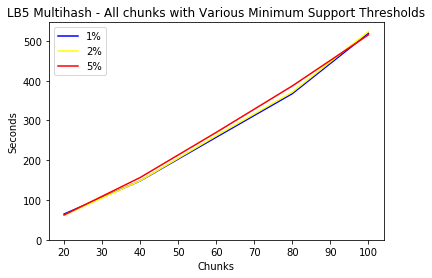

In [41]:
hashTable0 = [0]*40686666
hashTable1 = [0]*40686666
xaxis = [20, 40, 60, 80, 100]
scalePercent = [0.2, 0.4, 0.6, 0.8, 1.0]
filename = 'retail.dat.txt'
title = 'P5 Multihash - All chunks with Various Minimum Support Thresholds'
xLabel = 'Chunks'
yLabel = 'Seconds'
min_support = [ 0.01, 0.02, 0.05]
time1 = runTime(filename, scalePercent, xaxis, min_support[0])
time2 = runTime(filename, scalePercent, xaxis, min_support[1])
time5 = runTime(filename, scalePercent, xaxis, min_support[2])
pl.plot(xaxis, time1, color='blue', label="1%")                     
pl.plot(xaxis, time2, color='yellow', label="2%")  
pl.plot(xaxis, time5, color='red', label="5%")  
pl.legend(loc="upper left")          
pl.title(title)
pl.ylabel(yLabel)                         
pl.xlabel(xLabel)   
pl.ylim(ymin=0)
title += '.png'
pl.savefig(title)
pl.show() 
